<a href="https://colab.research.google.com/github/Redhoxx/VUT_ML/blob/main/MPA_MLF_PCA_lab2_brlhorset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [ ]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3


# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


# PCA on Iris data

In [ ]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

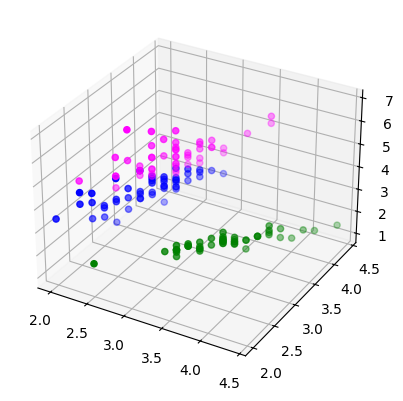

In [ ]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


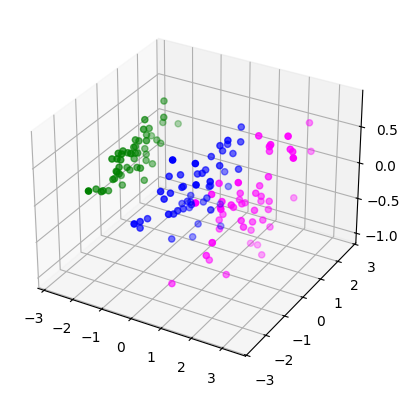

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpca[y == 0, 0], Xpca[y == 0, 1], Xpca[y == 0, 2], color='green')
axes2.scatter3D(Xpca[y == 1, 0], Xpca[y == 1, 1], Xpca[y == 1, 2], color='blue')
axes2.scatter3D(Xpca[y == 2, 0], Xpca[y == 2, 1], Xpca[y == 2, 2], color='magenta')
plt.show()

In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

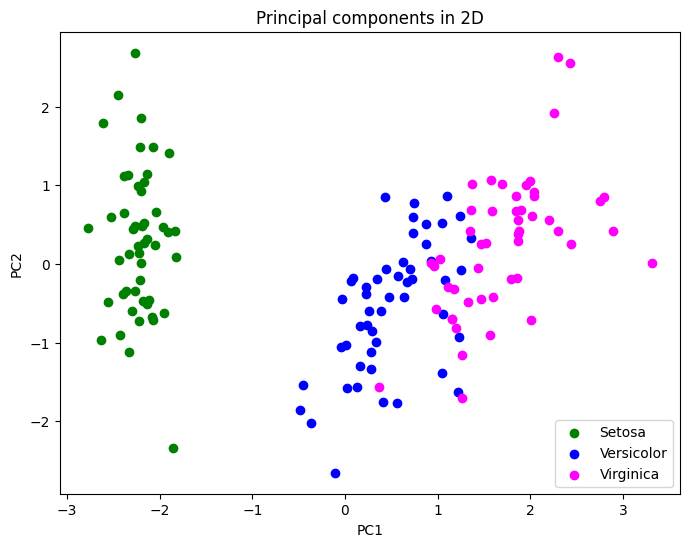

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], color='green', label='Setosa')
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], color='blue', label='Versicolor')
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], color='magenta', label='Virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal components in 2D')
plt.legend()
plt.show()

# KNN classifier

**Xpp + KNN**

[[17  0  0]
 [ 0 10  0]
 [ 0  2 16]]


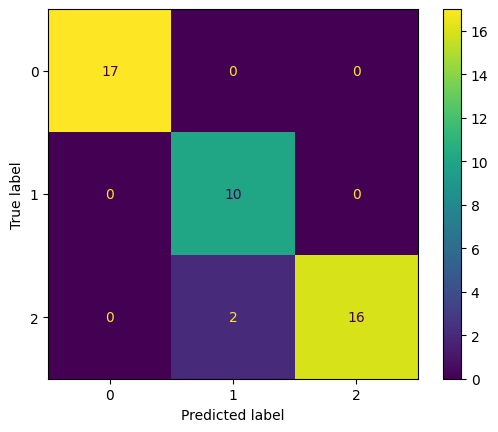

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Ypred_1 = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_test, Ypred_1))
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_1)

**Xpca + KNN**

[[12  0  0]
 [ 0 12  2]
 [ 0  1 18]]


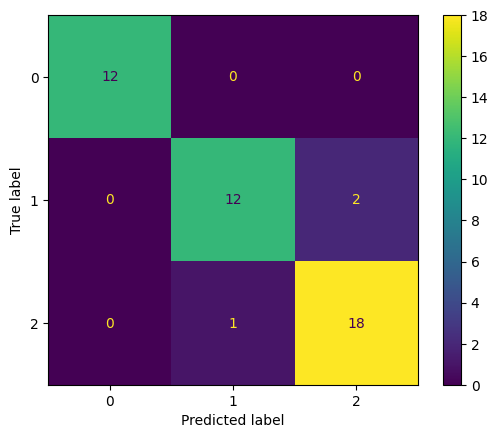

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Ypred_2 = knn.predict(X_test)

print(confusion_matrix(y_test, Ypred_2))
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_2)

**Xpca without 3rd feature + KNN**

[[16  0  0]
 [ 0 11  2]
 [ 0  0 16]]


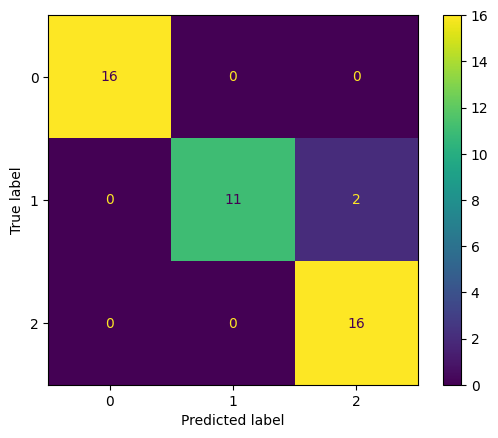

In [ ]:
Xpca_reduced = np.delete(Xpca, 2, axis=1)

X_train, X_test, y_train, y_test = train_test_split(Xpca_reduced, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Ypred_3 = knn.predict(X_test)

print(confusion_matrix(y_test, Ypred_3))
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_3)

**Xpca without 1st feature + KNN**

[[13  0  6]
 [ 6  4  3]
 [ 5  4  4]]


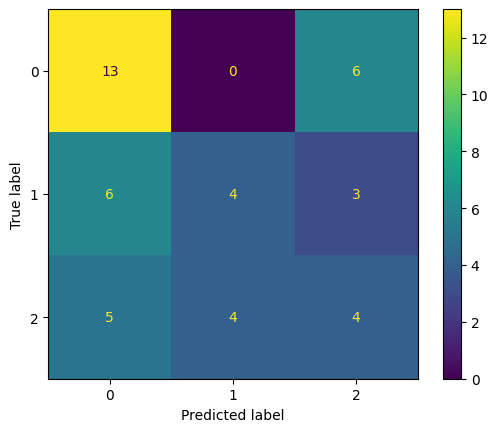

In [ ]:
Xpca_reduced = np.delete(Xpca, 0, axis=1)

X_train, X_test, y_train, y_test = train_test_split(Xpca_reduced, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Ypred_4 = knn.predict(X_test)

print(confusion_matrix(y_test, Ypred_4))
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_4)

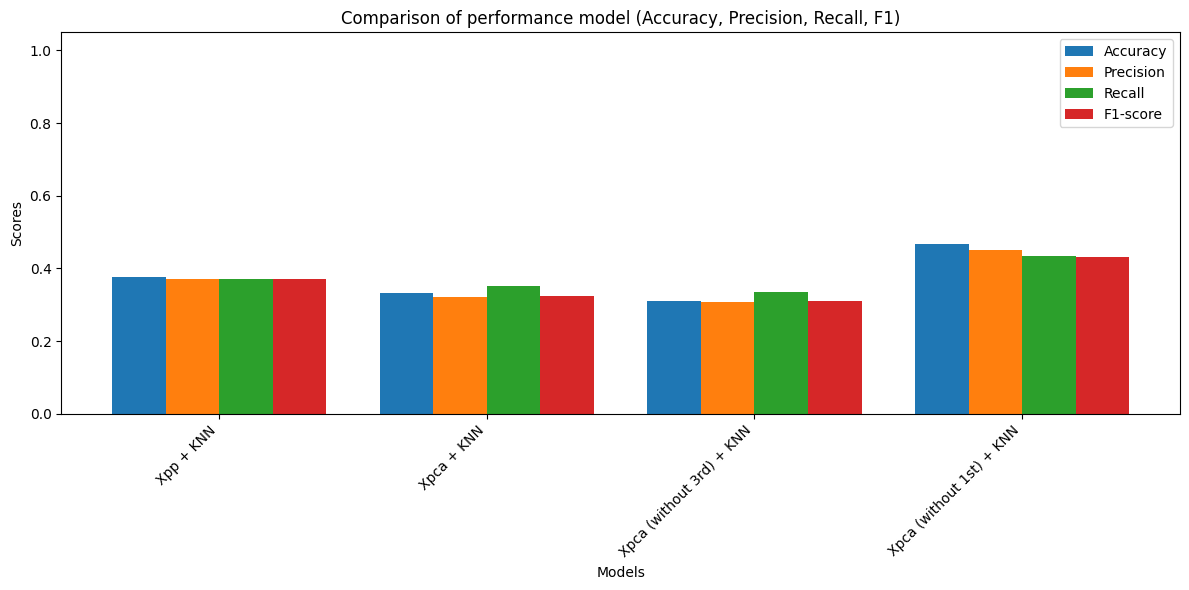

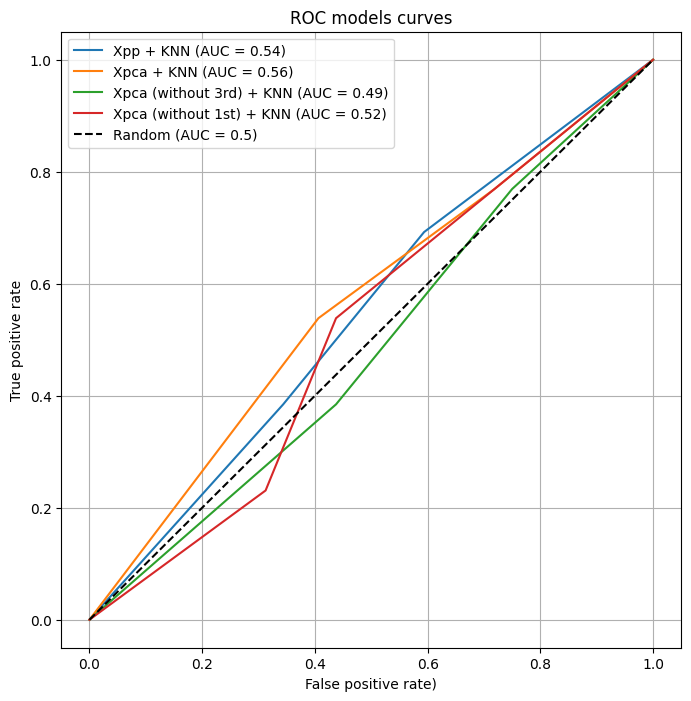


Recap table:
                    name  accuracy  precision   recall       f1  roc_auc
               Xpp + KNN  0.377778   0.372141 0.371120 0.369757 0.544471
              Xpca + KNN  0.333333   0.321368 0.352227 0.324561 0.562500
Xpca (without 3rd) + KNN  0.311111   0.307283 0.334683 0.310714 0.485577
Xpca (without 1st) + KNN  0.466667   0.449786 0.433198 0.431099 0.516827


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

models = [
    {"name": "Xpp + KNN", "y_pred": Ypred_1},
    {"name": "Xpca + KNN", "y_pred": Ypred_2},
    {"name": "Xpca (without 3rd) + KNN", "y_pred": Ypred_3},
    {"name": "Xpca (without 1st) + KNN", "y_pred": Ypred_4}
]

for model in models:
    model["accuracy"] = accuracy_score(y_test, model["y_pred"])
    model["precision"] = precision_score(y_test, model["y_pred"], average="macro")
    model["recall"] = recall_score(y_test, model["y_pred"], average="macro")
    model["f1"] = f1_score(y_test, model["y_pred"], average="macro")

    fpr, tpr, _ = roc_curve(y_test, model["y_pred"], pos_label=1)
    model["roc_auc"] = auc(fpr, tpr)

metrics = ["accuracy", "precision", "recall", "f1"]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]
model_names = [model["name"] for model in models]

metric_values = [[model[metric] for model in models] for metric in metrics]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(model_names))

for i, (metric_value, metric_name) in enumerate(zip(metric_values, metric_names)):
    ax.bar(x + i * bar_width, metric_value, bar_width, label=metric_name)

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of performance model (Accuracy, Precision, Recall, F1)")
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()
ax.set_ylim([0, 1.05])
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 8))
for model in models:
    fpr, tpr, _ = roc_curve(y_test, model["y_pred"], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model['name']} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False positive rate)")
plt.ylabel("True positive rate")
plt.title("ROC models curves")
plt.legend()
plt.grid(True)
plt.show()


import pandas as pd
df = pd.DataFrame(models)
df = df.drop(columns=['y_pred'])
print("\nRecap table:")
print(df.to_string(index=False))